In [1]:
import numpy as np
import pandas as pd
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [22]:
# change dir to your own working dir accordingly!
currentDir = os.getcwd()
datasetDir = currentDir + "/Dataset" 
os.chdir(datasetDir)
pictureDir = currentDir + "/Outputs"
if not os.path.exists(pictureDir):
    os.mkdir(pictureDir)

3_echo_measurements.csv
0.6363636363636364


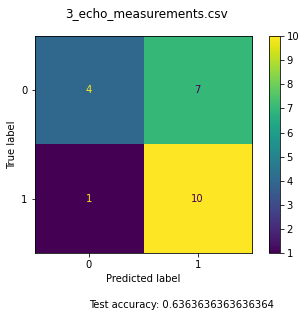

6_physical_functional_parameters.csv
0.7727272727272727


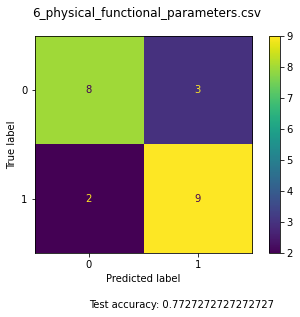

1_clinical_parameters.csv
0.5909090909090909


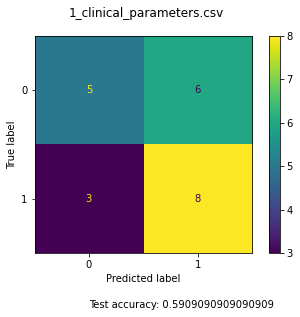

5_blood_biomarkers.csv
0.6363636363636364


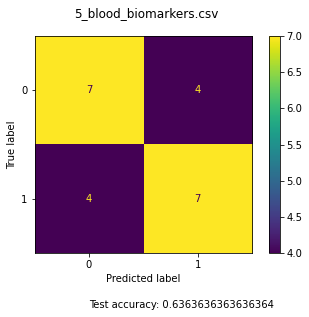

8_historical_metabolomics.csv
0.5454545454545454


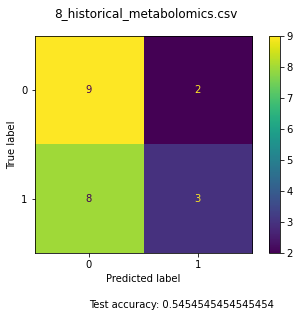

2_exercise.csv
0.5


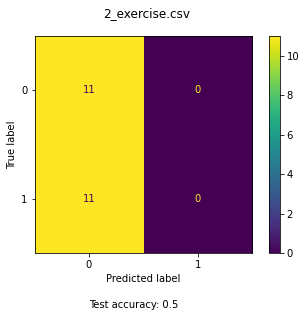

7_current_metabolomics.csv
0.5909090909090909


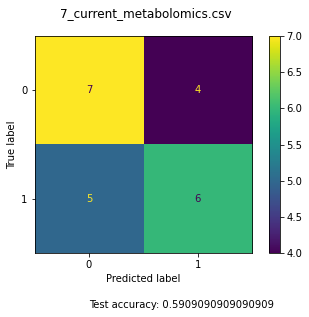

4_cmr_measurements.csv
0.6818181818181818


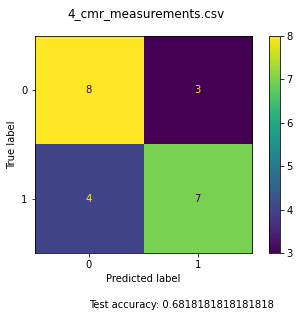

In [23]:
# for loop to read through all csv files
for fname in glob.glob("*.csv"):
    df = pd.read_csv(fname)
    print(fname)
    
    # replacing empty data and 'ND' with np.nan
    for colName in df:
        df[colName].replace('', np.nan, inplace=True)
        df[colName].replace('ND', np.nan, inplace=True)

    df = df.fillna(df.median())
    
    # using the last column (EE) as labels
    y = df["Cardiac_Category EE (0=good; 1=poor)"]
    X = df[df.columns.drop(["Cardiac_Category (0=good; 1=poor)", "Cardiac_Category EE (0=good; 1=poor)"])] 
    
    # split dataset into train and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1, test_size=0.25)
    clf = MLPClassifier(random_state=1, max_iter=2000).fit(X_train, y_train)
    
    # predicting + getting accuracy score on test data
    clf.predict_proba(X_test[:1])
    predictions_test = clf.predict(X_test)
    test_score = clf.score(X_test, y_test)
    
    # plotting and saving confusion matrix as png
    os.chdir(pictureDir)
    fig = plot_confusion_matrix(clf, X_test, y_test,display_labels=["0", "1"])
    fig.figure_.suptitle(fname)
    plt.text(0, 2, "Test accuracy: " + str(test_score))
    print(test_score)
    plt.savefig(fname[:-4] + ".png")    
    plt.show()
    os.chdir(datasetDir)